In [1]:
import gzip
from collections import defaultdict
import math
import scipy.optimize
from sklearn import svm
import numpy
import string
import random
import string
from sklearn import linear_model
import pandas as pd

In [2]:
import ast

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
def parseData(fname):
    for l in urllib.urlopen(fname):
        yield eval(l)

In [5]:
def parseDataFromFile(fname):
    for l in open(fname):
    #yield eval(l)
        yield ast.literal_eval(l)

In [6]:
data = list(parseDataFromFile("ratebeer.json"))

In [7]:
data

[{'beer/name': 'John Harvards Simcoe IPA',
  'beer/beerId': '63836',
  'beer/brewerId': '8481',
  'beer/ABV': '5.4',
  'beer/style': 'India Pale Ale &#40;IPA&#41;',
  'review/appearance': '4/5',
  'review/aroma': '6/10',
  'review/palate': '3/5',
  'review/taste': '6/10',
  'review/overall': '13/20',
  'review/time': '1157587200',
  'review/profileName': 'hopdog',
  'review/text': 'On tap at the Springfield, PA location. Poured a deep and cloudy orange (almost a copper) color with a small sized off white head. Aromas or oranges and all around citric. Tastes of oranges, light caramel and a very light grapefruit finish. I too would not believe the 80+ IBUs - I found this one to have a very light bitterness with a medium sweetness to it. Light lacing left on the glass.'},
 {'beer/name': 'John Harvards Simcoe IPA',
  'beer/beerId': '63836',
  'beer/brewerId': '8481',
  'beer/ABV': '5.4',
  'beer/style': 'India Pale Ale &#40;IPA&#41;',
  'review/appearance': '4/5',
  'review/aroma': '6/10',

In [8]:
df = pd.DataFrame(data)

In [9]:
df

,beer/name,beer/beerId,beer/brewerId,beer/ABV,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/overall,review/time,review/profileName,review/text
0,John Harvards Simcoe IPA,63836,8481,5.4,India Pale Ale &#40;IPA&#41;,4/5,6/10,3/5,6/10,13/20,1157587200,hopdog,"On tap at the Springfield, PA location. Poured..."
1,John Harvards Simcoe IPA,63836,8481,5.4,India Pale Ale &#40;IPA&#41;,4/5,6/10,4/5,7/10,13/20,1157241600,TomDecapolis,On tap at the John Harvards in Springfield PA....
2,John Harvards Cristal Pilsner,71716,8481,5,Bohemian Pilsener,4/5,5/10,3/5,6/10,14/20,958694400,PhillyBeer2112,"UPDATED: FEB 19, 2003 Springfield, PA. I've ne..."
3,John Harvards Fancy Lawnmower Beer,64125,8481,5.4,Klsch,2/5,4/10,2/5,4/10,8/20,1157587200,TomDecapolis,On tap the Springfield PA location billed as t...
4,John Harvards Fancy Lawnmower Beer,64125,8481,5.4,Klsch,2/5,4/10,2/5,4/10,8/20,1157587200,hopdog,"On tap at the Springfield, PA location. Poured..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924159,Oakhill Yeoman 1767 Strong Ale,5677,1028,5,Premium Bitter/ESB,4/5,5/10,3/5,6/10,12/20,1074816000,imdownthepub,"Cask conditioned at The Wild Goose, Combeignte..."
2924160,Oakhill Yeoman 1767 Strong Ale,5677,1028,5,Premium Bitter/ESB,4/5,4/10,3/5,6/10,13/20,1050796800,SilkTork,The original Oakhill Brewery was formed in 176...
2924161,Oakhill Yeoman 1767 Strong Ale,5677,1028,5,Premium Bitter/ESB,3/5,5/10,2/5,5/10,10/20,1016409600,omhper,Sampled cask conditioned. Amber coloured. Frui...
2924162,Oakhill Yeoman 1767 Strong Ale,5677,1028,5,Premium Bitter/ESB,4/5,8/10,4/5,7/10,15/20,1000252800,Bov,


In [10]:
n = 5
top5 = df['beer/style'].value_counts()[:n].index.tolist()

In [11]:
top5

['India Pale Ale &#40;IPA&#41;',
 'Pale Lager',
 'Belgian Strong Ale',
 'Imperial Stout',
 'Imperial/Double IPA']

In [12]:
df = df[df['beer/style'].isin(top5)]

In [13]:
len(df) # all beers in the top 5 categories for ratebeer 

683412

In [14]:
df_a = df.head(50000) #top 500000 of ones in top 5 categories

In [15]:
df_a

,beer/name,beer/beerId,beer/brewerId,beer/ABV,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/overall,review/time,review/profileName,review/text
0,John Harvards Simcoe IPA,63836,8481,5.4,India Pale Ale &#40;IPA&#41;,4/5,6/10,3/5,6/10,13/20,1157587200,hopdog,"On tap at the Springfield, PA location. Poured..."
1,John Harvards Simcoe IPA,63836,8481,5.4,India Pale Ale &#40;IPA&#41;,4/5,6/10,4/5,7/10,13/20,1157241600,TomDecapolis,On tap at the John Harvards in Springfield PA....
13,John Harvards Yin Yang Lager,64126,8481,4.5,Pale Lager,3/5,6/10,3/5,6/10,12/20,1157587200,TomDecapolis,On tap at Springfield location. Pours a trans...
14,John Harvards Yin Yang Lager,64126,8481,4.5,Pale Lager,3/5,5/10,2/5,5/10,9/20,1157587200,hopdog,"On tap at the Springfield, PA location. Poured..."
15,Barley Island Barrel-Aged Count Hopula,91592,3228,8,Imperial/Double IPA,4/5,8/10,4/5,8/10,15/20,1249257600,JJClark,Handbottled from trade wth Sprinkle. Pours a n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232356,Stone Imperial Russian Stout,4315,76,10.5,Imperial Stout,5/5,8/10,4/5,7/10,17/20,1293580800,Verecund,"Notes from 07/2009. 2009 vintage, making this ..."
232357,Stone Imperial Russian Stout,4315,76,10.5,Imperial Stout,3/5,7/10,4/5,6/10,15/20,1293321600,kidmartinek,"Dark, dark brown pour. Smallish off-white head..."
232358,Stone Imperial Russian Stout,4315,76,10.5,Imperial Stout,5/5,9/10,5/5,9/10,17/20,1293321600,horto008,Terrific. Pours black with a very light tan ...
232359,Stone Imperial Russian Stout,4315,76,10.5,Imperial Stout,4/5,9/10,5/5,9/10,17/20,1293148800,JohnMan,Wonderful imperial stout. Fully flavored roast...


In [16]:
df_a['beer/style'] = df_a['beer/style'].replace('India Pale Ale &#40;IPA&#41;','Indian Pale Ale')

In [17]:
df_a

,beer/name,beer/beerId,beer/brewerId,beer/ABV,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/overall,review/time,review/profileName,review/text
0,John Harvards Simcoe IPA,63836,8481,5.4,Indian Pale Ale,4/5,6/10,3/5,6/10,13/20,1157587200,hopdog,"On tap at the Springfield, PA location. Poured..."
1,John Harvards Simcoe IPA,63836,8481,5.4,Indian Pale Ale,4/5,6/10,4/5,7/10,13/20,1157241600,TomDecapolis,On tap at the John Harvards in Springfield PA....
13,John Harvards Yin Yang Lager,64126,8481,4.5,Pale Lager,3/5,6/10,3/5,6/10,12/20,1157587200,TomDecapolis,On tap at Springfield location. Pours a trans...
14,John Harvards Yin Yang Lager,64126,8481,4.5,Pale Lager,3/5,5/10,2/5,5/10,9/20,1157587200,hopdog,"On tap at the Springfield, PA location. Poured..."
15,Barley Island Barrel-Aged Count Hopula,91592,3228,8,Imperial/Double IPA,4/5,8/10,4/5,8/10,15/20,1249257600,JJClark,Handbottled from trade wth Sprinkle. Pours a n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232356,Stone Imperial Russian Stout,4315,76,10.5,Imperial Stout,5/5,8/10,4/5,7/10,17/20,1293580800,Verecund,"Notes from 07/2009. 2009 vintage, making this ..."
232357,Stone Imperial Russian Stout,4315,76,10.5,Imperial Stout,3/5,7/10,4/5,6/10,15/20,1293321600,kidmartinek,"Dark, dark brown pour. Smallish off-white head..."
232358,Stone Imperial Russian Stout,4315,76,10.5,Imperial Stout,5/5,9/10,5/5,9/10,17/20,1293321600,horto008,Terrific. Pours black with a very light tan ...
232359,Stone Imperial Russian Stout,4315,76,10.5,Imperial Stout,4/5,9/10,5/5,9/10,17/20,1293148800,JohnMan,Wonderful imperial stout. Fully flavored roast...


In [18]:
df_a['review/time'] = pd.to_datetime(df_a['review/time'],unit='s')

In [19]:
df_a

,beer/name,beer/beerId,beer/brewerId,beer/ABV,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/overall,review/time,review/profileName,review/text
0,John Harvards Simcoe IPA,63836,8481,5.4,Indian Pale Ale,4/5,6/10,3/5,6/10,13/20,2006-09-07,hopdog,"On tap at the Springfield, PA location. Poured..."
1,John Harvards Simcoe IPA,63836,8481,5.4,Indian Pale Ale,4/5,6/10,4/5,7/10,13/20,2006-09-03,TomDecapolis,On tap at the John Harvards in Springfield PA....
13,John Harvards Yin Yang Lager,64126,8481,4.5,Pale Lager,3/5,6/10,3/5,6/10,12/20,2006-09-07,TomDecapolis,On tap at Springfield location. Pours a trans...
14,John Harvards Yin Yang Lager,64126,8481,4.5,Pale Lager,3/5,5/10,2/5,5/10,9/20,2006-09-07,hopdog,"On tap at the Springfield, PA location. Poured..."
15,Barley Island Barrel-Aged Count Hopula,91592,3228,8,Imperial/Double IPA,4/5,8/10,4/5,8/10,15/20,2009-08-03,JJClark,Handbottled from trade wth Sprinkle. Pours a n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232356,Stone Imperial Russian Stout,4315,76,10.5,Imperial Stout,5/5,8/10,4/5,7/10,17/20,2010-12-29,Verecund,"Notes from 07/2009. 2009 vintage, making this ..."
232357,Stone Imperial Russian Stout,4315,76,10.5,Imperial Stout,3/5,7/10,4/5,6/10,15/20,2010-12-26,kidmartinek,"Dark, dark brown pour. Smallish off-white head..."
232358,Stone Imperial Russian Stout,4315,76,10.5,Imperial Stout,5/5,9/10,5/5,9/10,17/20,2010-12-26,horto008,Terrific. Pours black with a very light tan ...
232359,Stone Imperial Russian Stout,4315,76,10.5,Imperial Stout,4/5,9/10,5/5,9/10,17/20,2010-12-24,JohnMan,Wonderful imperial stout. Fully flavored roast...


In [20]:
df_a = df_a.sort_values(by=['review/time'])

In [21]:
df_a

,beer/name,beer/beerId,beer/brewerId,beer/ABV,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/overall,review/time,review/profileName,review/text
144972,Kalik,8682,140,5,Pale Lager,2/5,1/10,2/5,2/10,2/20,2000-04-23,billb,"The Bahamas was nice, but the beer wasnt. Kal..."
33328,Anderson Valley Hop Ottin IPA,336,60,7,Indian Pale Ale,5/5,9/10,5/5,10/10,19/20,2000-04-26,neilvis99,
9309,Chimay Bleue &#40;Blue&#41; / Grande Rserve,53,12,9,Belgian Strong Ale,4/5,5/10,2/5,4/10,8/20,2000-04-30,young,I had my first (only and last) glass of this o...
33327,Anderson Valley Hop Ottin IPA,336,60,7,Indian Pale Ale,3/5,8/10,4/5,7/10,15/20,2000-06-30,Oakes,All dressed up with nowhere to go. Typical fo...
219329,Allagash Grand Cru,3013,525,7.2,Belgian Strong Ale,4/5,8/10,5/5,9/10,16/20,2000-07-27,Sammys,"Very interesting, spicy/caramel aroma, similar..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207743,Great Western Premium Lager,27594,491,5,Pale Lager,2/5,5/10,2/5,4/10,10/20,2012-01-13,reebtogi,355ml can pours straw in color with a fast dis...
207723,Great Western Brewhouse Pilsner,29717,491,5,Pale Lager,2/5,4/10,2/5,5/10,10/20,2012-01-13,reebtogi,355ml can pours straw in color with a small wh...
207803,Great Western Original Ice,75043,491,6.2,Pale Lager,3/5,5/10,2/5,5/10,10/20,2012-01-13,reebtogi,2L plastic bottle pours a pale golden color wi...
215624,Winterkoninkske Grand Cru,114597,1810,13,Belgian Strong Ale,4/5,7/10,3/5,7/10,14/20,2012-01-13,meerbier,Bottle@Home. Pouring this beer somehow I expec...


In [22]:
df_a['review/text'].isnull().values.any()

False

In [23]:
temp = df_a.values.tolist()

In [26]:
time_dict = {}
from datetime import datetime as dt, timedelta as td
start = str(temp[0][10]).split(" ")[0]
end = str(temp[-1][10]).split(" ")[0]
sd = dt.strptime(start,'%Y-%m-%d')
ed = dt.strptime(end,'%Y-%m-%d')
delta = ed - sd
delta
for i in range(delta.days+1):
    time_dict[sd + td(days=i)] = 0 

In [28]:

for rev in temp:
    time = str(rev[10].to_pydatetime()).split(" ")[0]
    time_dict[rev[10]] += 1
time_dict
    

{datetime.datetime(2000, 4, 23, 0, 0): 1,
 datetime.datetime(2000, 4, 24, 0, 0): 0,
 datetime.datetime(2000, 4, 25, 0, 0): 0,
 datetime.datetime(2000, 4, 26, 0, 0): 1,
 datetime.datetime(2000, 4, 27, 0, 0): 0,
 datetime.datetime(2000, 4, 28, 0, 0): 0,
 datetime.datetime(2000, 4, 29, 0, 0): 0,
 datetime.datetime(2000, 4, 30, 0, 0): 1,
 datetime.datetime(2000, 5, 1, 0, 0): 0,
 datetime.datetime(2000, 5, 2, 0, 0): 0,
 datetime.datetime(2000, 5, 3, 0, 0): 0,
 datetime.datetime(2000, 5, 4, 0, 0): 0,
 datetime.datetime(2000, 5, 5, 0, 0): 0,
 datetime.datetime(2000, 5, 6, 0, 0): 0,
 datetime.datetime(2000, 5, 7, 0, 0): 0,
 datetime.datetime(2000, 5, 8, 0, 0): 0,
 datetime.datetime(2000, 5, 9, 0, 0): 0,
 datetime.datetime(2000, 5, 10, 0, 0): 0,
 datetime.datetime(2000, 5, 11, 0, 0): 0,
 datetime.datetime(2000, 5, 12, 0, 0): 0,
 datetime.datetime(2000, 5, 13, 0, 0): 0,
 datetime.datetime(2000, 5, 14, 0, 0): 0,
 datetime.datetime(2000, 5, 15, 0, 0): 0,
 datetime.datetime(2000, 5, 16, 0, 0): 0,
 

In [29]:
import matplotlib.pyplot as plt
data = list(time_dict.items())

print(data)


[(datetime.datetime(2000, 4, 23, 0, 0), 1), (datetime.datetime(2000, 4, 24, 0, 0), 0), (datetime.datetime(2000, 4, 25, 0, 0), 0), (datetime.datetime(2000, 4, 26, 0, 0), 1), (datetime.datetime(2000, 4, 27, 0, 0), 0), (datetime.datetime(2000, 4, 28, 0, 0), 0), (datetime.datetime(2000, 4, 29, 0, 0), 0), (datetime.datetime(2000, 4, 30, 0, 0), 1), (datetime.datetime(2000, 5, 1, 0, 0), 0), (datetime.datetime(2000, 5, 2, 0, 0), 0), (datetime.datetime(2000, 5, 3, 0, 0), 0), (datetime.datetime(2000, 5, 4, 0, 0), 0), (datetime.datetime(2000, 5, 5, 0, 0), 0), (datetime.datetime(2000, 5, 6, 0, 0), 0), (datetime.datetime(2000, 5, 7, 0, 0), 0), (datetime.datetime(2000, 5, 8, 0, 0), 0), (datetime.datetime(2000, 5, 9, 0, 0), 0), (datetime.datetime(2000, 5, 10, 0, 0), 0), (datetime.datetime(2000, 5, 11, 0, 0), 0), (datetime.datetime(2000, 5, 12, 0, 0), 0), (datetime.datetime(2000, 5, 13, 0, 0), 0), (datetime.datetime(2000, 5, 14, 0, 0), 0), (datetime.datetime(2000, 5, 15, 0, 0), 0), (datetime.datetime(

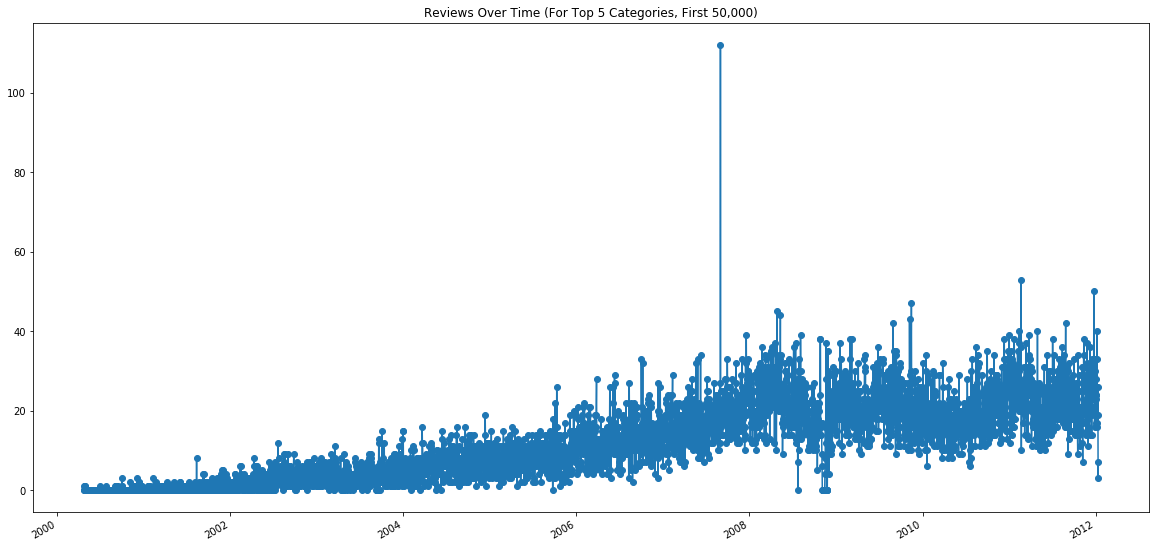

In [30]:
fig, ax = plt.subplots(figsize=(20, 10))

dates = [x[0] for x in data]
values = [x[1] for x in data]

ax.plot(dates, values, 'o-')
ax.set_title("Reviews Over Time (For Top 5 Categories, First 50,000)")
fig.autofmt_xdate()

plt.show()